In [59]:
import matplotlib.pyplot as plt

In [60]:
def print_tsp_sample(file_path, num_lines=10):
    with open(file_path, 'r') as file:
        for i, line in enumerate(file):
            if i >= num_lines:
                break
            print(line.strip())

file_path = 'zi929.tsp'
print_tsp_sample(file_path, num_lines=15)       

NAME : zi929
COMMENT : 929 locations in Zimbabwe
COMMENT : Derived from National Imagery and Mapping Agency data
TYPE : TSP
DIMENSION : 929
EDGE_WEIGHT_TYPE : EUC_2D
NODE_COORD_SECTION
1 15700.0000 30316.6667
2 16033.3333 28850.0000
3 16200.0000 31583.3333
4 16233.3333 31533.3333
5 16250.0000 31516.6667
6 16300.0000 29250.0000
7 16500.0000 29933.3333
8 16516.6667 28800.0000


In [61]:
def read_tsp_file(file_path):
    nodes = []
    with open(file_path, 'r') as file:
        lines = file.readlines()
        start_reading = False
        for line in lines:
            if "NODE_COORD_SECTION" in line:
                start_reading = True
                continue
            if start_reading:
                if line.strip() == "EOF":
                    break
                parts = line.split()
                node_id, x, y = int(parts[0]), float(parts[1]), float(parts[2])
                nodes.append((x, y))
    return nodes

In [62]:
def plot_tsp(nodes, show_path=False):
    x_coords, y_coords = zip(*nodes)
    plt.scatter(x_coords, y_coords, color='blue', label='Cities',s = 1)
        
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.title("TSP Tour Visualization")
    plt.legend()
    plt.show()

In [63]:
file_path = 'zi929.tsp'
nodes = read_tsp_file(file_path)

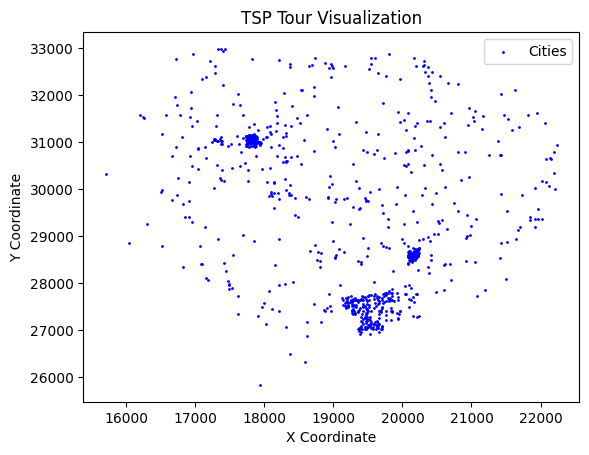

In [64]:
plot_tsp(nodes, show_path=True)

In [65]:
print(nodes)

[(15700.0, 30316.6667), (16033.3333, 28850.0), (16200.0, 31583.3333), (16233.3333, 31533.3333), (16250.0, 31516.6667), (16300.0, 29250.0), (16500.0, 29933.3333), (16516.6667, 28800.0), (16516.6667, 29983.3333), (16516.6667, 31183.3333), (16566.6667, 31583.3333), (16666.6667, 29766.6667), (16666.6667, 30700.0), (16700.0, 31966.6667), (16716.6667, 30900.0), (16716.6667, 32766.6667), (16733.3333, 29883.3333), (16733.3333, 31783.3333), (16750.0, 30233.3333), (16783.3333, 31583.3333), (16800.0, 31116.6667), (16816.6667, 28350.0), (16816.6667, 29683.3333), (16850.0, 29416.6667), (16900.0, 29416.6667), (16900.0, 29750.0), (16900.0, 30150.0), (16916.6667, 30700.0), (16916.6667, 31533.3333), (16933.3333, 31716.6667), (16933.3333, 32066.6667), (16950.0, 29300.0), (16950.0, 30500.0), (16950.0, 31333.3333), (16966.6667, 32866.6667), (17016.6667, 31450.0), (17033.3333, 30433.3333), (17033.3333, 30850.0), (17033.3333, 30866.6667), (17066.6667, 28800.0), (17083.3333, 28400.0), (17100.0, 28400.0), (17

In [66]:
def euclidean(x1,x2,y1,y2):
    distance = (((x1-x2)**2)+((y1-y2)**2))**0.5
    return distance

In [67]:
class graph():
    def __init__(self,size):
        self.size = size
        self.box = [[0]* size for _ in range(size)]
    def parrent_nodes(self,u,v,weight):
        self.box[u][v] = weight
        self.box[v][u] = weight

a = graph(5)
print(a.box)

[[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]


In [143]:
size = 929
K = 2    #many of city to make a path of each city 
my_graph = graph(size)

for num, i in enumerate(nodes):
    my_box = []
    for j,k in enumerate(nodes):
        distance = euclidean(i[0],k[0], i[1], k[1])
        my_box.append([distance, j])
    sorted_box = sorted(my_box)
    #print(sorted_box)
    for l in range(1,K+1):
       my_graph.parrent_nodes(num,my_box[l][1],my_box[l][0])    

In [138]:
print(my_graph.box[1])

[1504.0685814741908, 0.0, 2738.409888562662, 2690.776393327562, 2675.4543068005833, 480.74018855187245, 1179.571467855075, 485.91272421656265, 1232.093967376047, 2382.8670681438452, 2784.87978994506, 1114.176392877023, 1955.4056345309946, 3187.1705018366665, 2160.889755530245, 3975.8297969662212, 1248.1096541926452, 3015.699628426027, 1557.9544851431876, 2834.362526016896, 2392.813356235247, 929.306846824859, 1143.7025856595976, 994.0098831388858, 1035.4816839412376, 1249.4443440541438, 1562.4055711910687, 2050.067778283333, 2824.9876981049747, 3004.62609468947, 3340.2012901753237, 1021.1649420582796, 1887.5322087023812, 2647.115811175962, 4123.678286972016, 2779.738220688337, 1872.683726337387, 2236.067977499789, 2250.987467510402, 1034.5423701113275, 1142.3659658795846, 1157.7036964996223, 3658.9312440778235, 1154.339638061518, 2326.4780248263673, 1335.9349713881202, 2132.42172606119, 3705.588850341841, 1391.4420788839482, 4043.6851144030074, 2462.214450449025, 1709.2071186501798, 25

In [139]:
print(nodes)

[(15700.0, 30316.6667), (16033.3333, 28850.0), (16200.0, 31583.3333), (16233.3333, 31533.3333), (16250.0, 31516.6667), (16300.0, 29250.0), (16500.0, 29933.3333), (16516.6667, 28800.0), (16516.6667, 29983.3333), (16516.6667, 31183.3333), (16566.6667, 31583.3333), (16666.6667, 29766.6667), (16666.6667, 30700.0), (16700.0, 31966.6667), (16716.6667, 30900.0), (16716.6667, 32766.6667), (16733.3333, 29883.3333), (16733.3333, 31783.3333), (16750.0, 30233.3333), (16783.3333, 31583.3333), (16800.0, 31116.6667), (16816.6667, 28350.0), (16816.6667, 29683.3333), (16850.0, 29416.6667), (16900.0, 29416.6667), (16900.0, 29750.0), (16900.0, 30150.0), (16916.6667, 30700.0), (16916.6667, 31533.3333), (16933.3333, 31716.6667), (16933.3333, 32066.6667), (16950.0, 29300.0), (16950.0, 30500.0), (16950.0, 31333.3333), (16966.6667, 32866.6667), (17016.6667, 31450.0), (17033.3333, 30433.3333), (17033.3333, 30850.0), (17033.3333, 30866.6667), (17066.6667, 28800.0), (17083.3333, 28400.0), (17100.0, 28400.0), (17

In [140]:
edges = []
for i in range(0,size):
    for k,j in enumerate(my_graph.box[i]):
        if(j!= 0):
            edges.append((i,k))
print(edges)

[(0, 1), (0, 2), (1, 0), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (1, 12), (1, 13), (1, 14), (1, 15), (1, 16), (1, 17), (1, 18), (1, 19), (1, 20), (1, 21), (1, 22), (1, 23), (1, 24), (1, 25), (1, 26), (1, 27), (1, 28), (1, 29), (1, 30), (1, 31), (1, 32), (1, 33), (1, 34), (1, 35), (1, 36), (1, 37), (1, 38), (1, 39), (1, 40), (1, 41), (1, 42), (1, 43), (1, 44), (1, 45), (1, 46), (1, 47), (1, 48), (1, 49), (1, 50), (1, 51), (1, 52), (1, 53), (1, 54), (1, 55), (1, 56), (1, 57), (1, 58), (1, 59), (1, 60), (1, 61), (1, 62), (1, 63), (1, 64), (1, 65), (1, 66), (1, 67), (1, 68), (1, 69), (1, 70), (1, 71), (1, 72), (1, 73), (1, 74), (1, 75), (1, 76), (1, 77), (1, 78), (1, 79), (1, 80), (1, 81), (1, 82), (1, 83), (1, 84), (1, 85), (1, 86), (1, 87), (1, 88), (1, 89), (1, 90), (1, 91), (1, 92), (1, 93), (1, 94), (1, 95), (1, 96), (1, 97), (1, 98), (1, 99), (1, 100), (1, 101), (1, 102), (1, 103), (1, 104), (1, 105), (1, 106), (1, 107), (1, 108), (1, 109), (

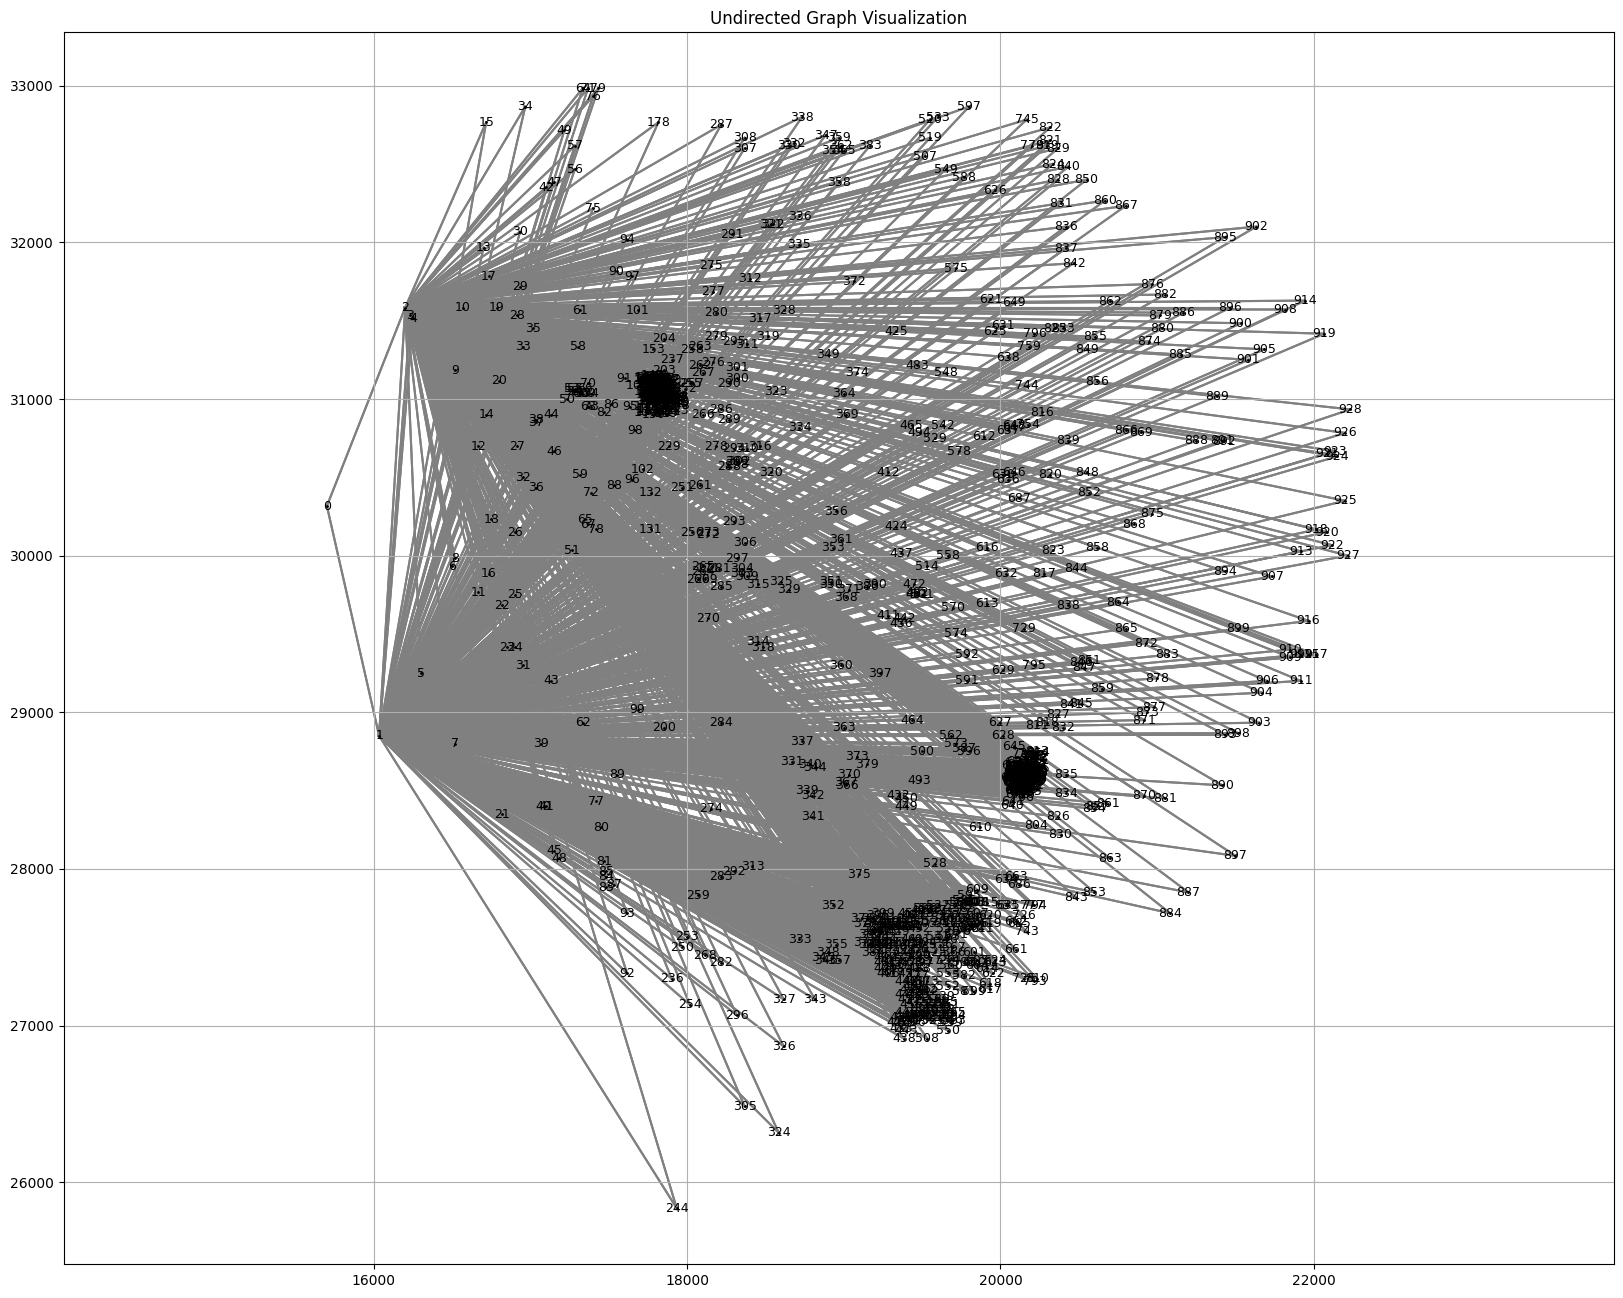

In [141]:
def visualize_graph_matplotlib(nodes, edges):
    plt.figure(figsize=(20, 16))
    # Draw edges
    for edge in edges:
        i, j = edge
        x_values = [nodes[i][0], nodes[j][0]]
        y_values = [nodes[i][1], nodes[j][1]]
        plt.plot(x_values, y_values, color='gray', zorder=1)

    # Draw nodes
    x_coords = [node[0] for node in nodes]
    y_coords = [node[1] for node in nodes]
    plt.scatter(x_coords, y_coords, color='blue', label='Cities',s = 1,zorder=2,edgecolors='black')
    #plt.scatter(x_coords, y_coords, color='skyblue', s=100, zorder=2, edgecolors='black')

    # Add labels
    for idx, (x, y) in enumerate(nodes):
        plt.text(x, y, str(idx), fontsize=9, ha='center', va='center', zorder=3, color='black')

    plt.title("Undirected Graph Visualization")
    plt.axis('equal')  # Keep aspect ratio square
    plt.grid(True)
    plt.show()
visualize_graph_matplotlib(nodes, edges)

